<a href="https://colab.research.google.com/github/alda1896/repositorio1/blob/master/Ejercicio8_14.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from numpy import array,arange
from pylab import plot,show,xlabel,ylabel,grid,title,xlim
from math import sqrt,pow

**Ecuación de  Schrödinger**

\begin{equation}
\frac{d^{2}\psi }{dx^{2}}=\frac{2m}{\hbar}\left [ V(x)-E \right ]\psi 
\end{equation}

**Escribimos La ecuación de segundo orden como dos de primer orden**

\begin{equation}
\frac{d\psi }{dx}= \phi
\end{equation}


\begin{equation}
\frac{d^{2}\psi }{dx^{2}}= \frac{d\phi }{dx}
\end{equation}

**Funciones de potencial**

\begin{equation}
V(x)=V_{0}\frac{x^{2}}{a^{2}}
\end{equation}

**Oscilador inarmonico**
\begin{equation}
V(x)=V_{0}\frac{x^{4}}{a^{4}}
\end{equation}



In [ ]:
# Constantes
m = 9.1094e-31     # Masa del electrón
hbar = 1.0546e-34  # Constante de Planck reducida
e = 1.6022e-19     # Carga del electron

v0 = 50*e #J
a = 1e-11 #m

# Dimensiones del  primer pozo de potencial 
xi1=-10*a   
xf1= 10*a
# Dimensiones del  segundo pozo de potencial 
xi2=-5*a
xf2= 5*a

N =1000  #Numero de Puntos

#tamaño del paso
h1 = (xf1-xi1)/N  
h2 = (xf2-xi2)/N

#Arreglos que contienen los puntos para cada pozo de potencial
xpoints1 = arange(xi1,xf1,h1)
xpoints2 = arange(xi2,xf2,h2)



In [ ]:
 #Funciones de potencial
def V1(x):
  v0 = 50*e #ev
  a = 1e-11 #m
  return (v0*x**2)/(a**2)

 # potencial para el anharmonic oscillator
def V2(x):
  v0 = 50*e #ev
  a = 1e-11 #m
  return (v0*pow(x,4))/(pow(a,4))

# Función que contiene la ecuación de Schrodinger en forma de dos ecuaciones de primer orden 
def f(r,x,E,V):  #Recibe como parametros un vector con los valores iniciales, la energía y el potencial que a su ves es funcón de la posición
    psi = r[0]
    phi = r[1]
    fpsi = phi
    fphi = (2*m/hbar**2)*(V(x)-E)*psi
    return array([fpsi,fphi],float) 

In [ ]:
# Calculo de la funcón de onda (Psi)

def solve(E,V,xpoints,h): # Funcion que retorna el último valor en x para comprobar si cumple la condicion de contorno (Psi=0 en x= 10a)
    psi = 0.0
    phi = 1.0
    r = array([psi,phi],float)

    for x in xpoints:           
        k1 = h*f(r,x,E,V)
        k2 = h*f(r+0.5*k1,x+0.5*h,E,V)
        k3 = h*f(r+0.5*k2,x+0.5*h,E,V)
        k4 = h*f(r+k3,x+h,E,V)
        r += (k1+2*k2+2*k3+k4)/6

    return r[0]

In [ ]:
E=e #Energia inicial

def energia(Ei,Ef,V,xpoints,h):  # Programa principal para encontrar la energía usando el método secante
  psi2 = solve(Ei,V,xpoints,h)

  target = e/4000
  while abs(Ei-Ef)>target:
      psi1,psi2 = psi2,solve(Ef,V,xpoints,h)
      Ei,Ef = Ef,Ef-psi2*(Ef-Ei)/(psi2-psi1)
  return Ef

Energias=[]  # Arreglo donde guardamos las tres primeras energías que cumplen las condiciones de contorno
for i in arange(0,3,1): #Encontramos las tres primeras energias teniendo en cuenta que están igualmente espaciadas
  E=energia(1.4*E,2.6*E,V1,xpoints1,h1)
  Energias.append(E/e)
print(Energias)  #Imprimimos las energias en unidades de eV

[138.02397205978266, 414.07191654150415, 1242.215759668508]


In [ ]:
def RK4(E,V,xpoints,h):  #Función que nos da los valores de la función de onda usando el método de Runge-Kutta
    psi = 0.0
    phi = 1.0
    r = array([psi,phi],float)
    
    psipoints = []

    for x in xpoints:
      psipoints.append(r[0])
      k1 = h*f(r,x,E,V)
      k2 = h*f(r+0.5*k1,x+0.5*h,E,V)
      k3 = h*f(r+0.5*k2,x+0.5*h,E,V)
      k4 = h*f(r+k3,x+h,E,V)
      r += (k1+2*k2+2*k3+k4)/6

    return psipoints

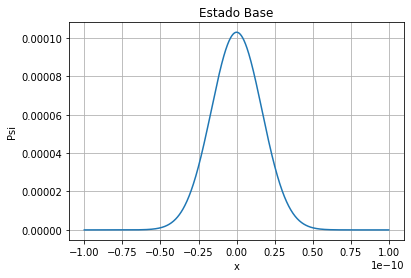

In [ ]:
# Graficamoos el la función de onda para los tres primeros estados sin normalizar
Psi1= RK4(Energias[0]*e,V1,xpoints1,h1)
plot(xpoints1,Psi1)
title('Estado Base')
xlabel('x')
ylabel('Psi')
grid()
show()

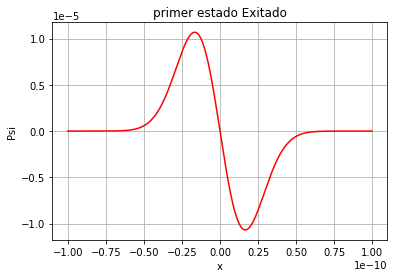

In [ ]:
Psi2= RK4(Energias[1]*e,V1,xpoints1,h1)
plot(xpoints1,Psi2,'r')
title('primer estado Exitado')
xlabel('x')
ylabel('Psi')
grid()
show()

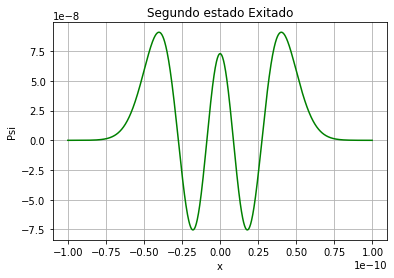

In [ ]:
Psi3= RK4(Energias[2]*e,V1,xpoints1,h1)
plot(xpoints1,Psi3,'g')
title('Segundo estado Exitado')
xlabel('x')
ylabel('Psi')
grid()
show()

In [ ]:
# Ahora calculamos las energías que cumplen las condiciones de contorno para el potencial de un oscilador inarmónico
En=1e-19
Energias2=[]

for i in arange(0,3,1):
  En=energia(1.7*En,2.3*En,V2,xpoints1,h1)
  Energias2.append(En/e)
print(Energias2)

[205.3069034693635, 735.6912470405589, 1443.5694213323018]


In [ ]:
# Guardamos los valores de las funciones de onda  para los tres primeros estados de energía para el oscilador inarmónico
PSI1= RK4(Energias2[0]*e,V2,xpoints2,h2)
PSI2= RK4(Energias2[1]*e,V2,xpoints2,h2)
PSI3= RK4(Energias2[2]*e,V2,xpoints2,h2)

De acuerdo con la interpretación probabilística de la función de onda

\begin{equation}
\left | \Psi (\vec{r}) \right |^{2}d\vec{r}
\end{equation}


 representa la probabilidad de encontrar la partícula, en el instante t, en el elemento de volumen **dr** en torno al punto **r**.
Como consecuencia, la probabilidad de encontrar la partícula en todo el espacio será la unidad y, por tanto

\begin{equation}
\int \left | \Psi (\vec{r}) \right |^{2}d\vec{r}=1
\end{equation}

En nuestro caso esto el pozo de potencial es unidimensional entonces :

\begin{equation}
\int_{-\infty}^{\infty}  \left | \Psi (x) \right |^{2}dx=1
\end{equation}




In [ ]:
#Ahora normalizamos las funciones de onda usando integración numérica

PsiCuadrado=[i**2 for i in PSI1]  # hallamos elcuadrado del a funcion de onda

integral = h2  *(0.5*PsiCuadrado[0] + 0.5*PsiCuadrado[N-1] +sum(PsiCuadrado[0 : N-2 : 1])) # Integramos usando el metodo del trapecio

PSI1_norm=[i/sqrt(integral) for i in PSI1]  #Función de onda normalizada

PsiCuadrado2=[i**2 for i in PSI2] 

integral2 = h2  *(0.5*PsiCuadrado2[0] + 0.5*PsiCuadrado2[N-1] +sum(PsiCuadrado2[0 : N-2 : 1]))

PSI2_norm=[i/sqrt(integral2) for i in PSI2]  

PsiCuadrado3=[i**2 for i in PSI3] 

integral3 = h2  *(0.5*PsiCuadrado3[0] + 0.5*PsiCuadrado3[N-1] +sum(PsiCuadrado3[0 : N-2 : 1]))

PSI3_norm=[i/sqrt(integral3) for i in PSI3]  

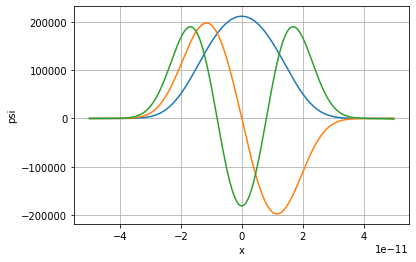

In [ ]:
#Finalmente Graficamos las funciones de onda normalizadas para los tres primeros estados de energía para un oscilador inarmónico

plot(xpoints2,PSI1_norm)
plot(xpoints2,PSI2_norm)
plot(xpoints2,PSI3_norm)
xlabel('x')
ylabel('psi')
grid()
show()